Heart Disease Prediction

Columns :
1.age = age in years

2.sex= (1 = male; 0 = female)

3.cp = chest pain type

4.trestbpsr = esting blood pressure (in mm Hg on admission to the hospital)

5.chol = serum cholestoral in mg/dl

6.fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7.restecg = resting electrocardiographic results

8.thalach = maximum heart rate achieved

9.exang = exercise induced angina (1 = yes; 0 = no)

10.oldpeak = ST depression induced by exercise relative to rest

11.slope = the slope of the peak exercise ST segment

12.ca = number of major vessels (0-3) colored by flourosopy

13.thal = 3 = normal; 6 = fixed defect; 7 = reversable defect

14.target = 1 or 0

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


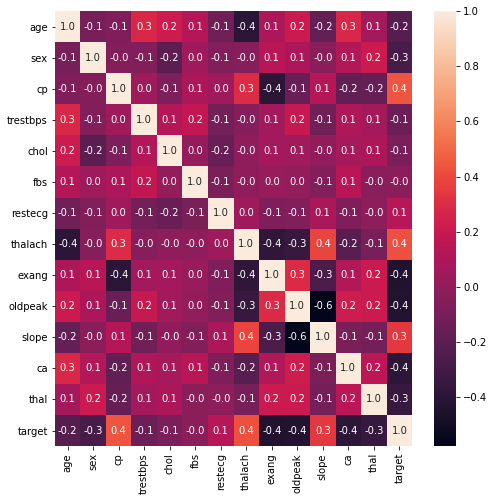

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

C:\Users\SMART\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


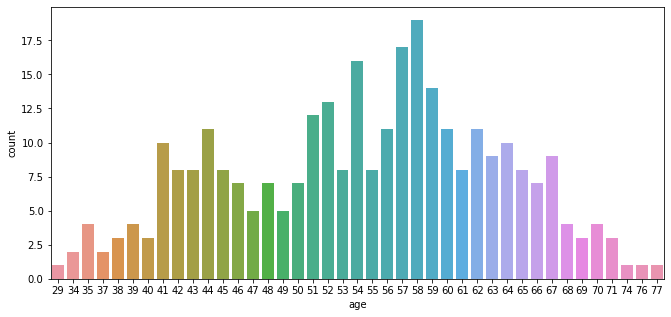

In [19]:
plt.figure(figsize=(11,5))
sns.countplot("age", data=df)
plt.show()

In [44]:
young_ages = df[(df.age>=29)&(df.age<40)]
middle_ages = df[(df.age>=40)&(df.age<55)]
elderly_ages = df[(df.age>=55)]

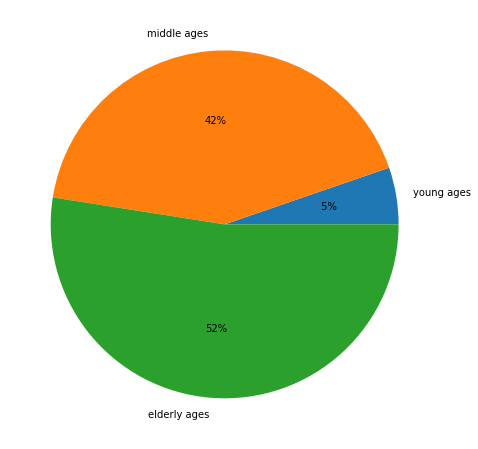

In [45]:
plt.figure(figsize= (8,8))
plt.pie([len(young_ages), len(middle_ages), len(elderly_ages)], labels=['young ages', 'middle ages', 'elderly ages'],autopct="%2i%%")
plt.show()

([<matplotlib.axis.XTick at 0x29064cbcb20>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

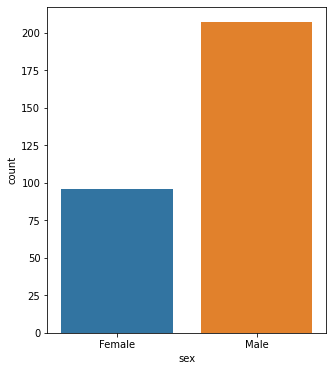

In [38]:
plt.figure(figsize=(5,6))
sns.countplot(x= df["sex"])
plt.xticks([0, 1],['Female','Male'])

([<matplotlib.axis.XTick at 0x290644d8f40>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

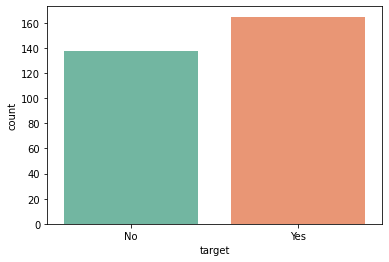

In [53]:
sns.countplot(x= df["target"], palette="Set2")
plt.xticks([0, 1],['No','Yes'])

<AxesSubplot:ylabel='cp'>

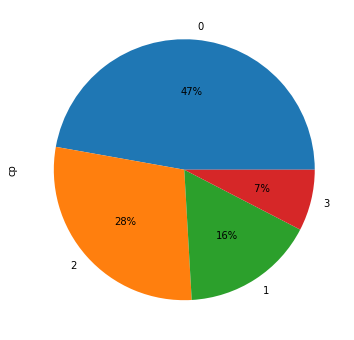

In [60]:
plt.figure(figsize=(6,6))
df.cp.value_counts().plot(kind='pie', autopct="%2i%%")


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [67]:
X = df.drop(['target'], axis = 1)
y = df["target"]

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [69]:
lr.fit(x_train, y_train)

C:\Users\SMART\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
y_pred = lr.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [74]:
predicted= pd.DataFrame(data={"Predicted": y_pred, "Actual": y_test})
predicted.head(10)

,Predicted,Actual
225,0,0
152,1,1
228,1,0
201,0,0
52,0,1
245,0,0
175,0,0
168,0,0
223,0,0
217,0,0


In [73]:
lr.score(x_test, y_test)

0.8524590163934426

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state= 2)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=2)

In [95]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [96]:
predicted= pd.DataFrame(data={"Predicted": y_pred_rf, "Actual": y_test})
predicted.head(10)

,Predicted,Actual
225,0,0
152,1,1
228,1,0
201,0,0
52,0,1
245,1,0
175,0,0
168,0,0
223,0,0
217,0,0


In [97]:
rf.score(x_test, y_test)

0.8524590163934426

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [87]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [88]:
predicted= pd.DataFrame(data={"Predicted": y_pred_knn, "Actual": y_test})
predicted.head(10)

,Predicted,Actual
225,0,0
152,0,1
228,1,0
201,0,0
52,0,1
245,1,0
175,0,0
168,0,0
223,0,0
217,0,0


In [89]:
knn.score(x_test, y_test)

0.639344262295082

In [90]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

SVC(random_state=1)

In [91]:
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [92]:
predicted= pd.DataFrame(data={"Predicted": y_pred_svm, "Actual": y_test})
predicted.head(10)

,Predicted,Actual
225,0,0
152,1,1
228,1,0
201,1,0
52,1,1
245,1,0
175,0,0
168,1,0
223,0,0
217,0,0


In [93]:
svm.score(x_test, y_test)

0.6885245901639344

<BarContainer object of 4 artists>

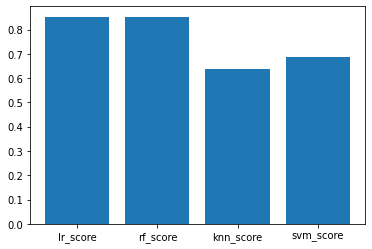

In [103]:
x = ["lr_score", "rf_score", "knn_score", "svm_score"]
y = [0.8524590163934426,0.8524590163934426,0.639344262295082,0.6885245901639344]
plt.bar(x,y)